In [1]:
from ipaddress import ip_address, ip_network

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from operator import itemgetter
from matplotlib.dates import DateFormatter
from IPython.display import Markdown, display

In [2]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 20

In [3]:
def print_md(s):
    display(Markdown(s))

## Read data

In [4]:
events_df = pd.read_csv('./events.csv')
geo_ipv4_df = pd.read_csv('./GeoLite2-City-CSV_20170905/GeoLite2-City-Blocks-IPv4.csv')
geo_loc_df = pd.read_csv('./GeoLite2-City-CSV_20170905/GeoLite2-City-Locations-en.csv')

In [5]:
events_df.head()

,user_id,event,item,ip,timestamp
0,0dd76d2f80eb4865109741e5ce105e5e,Click Product,sku_e0a1cdce,181.50.103.43,2017-02-01T21:22:43.707774Z
1,bc39446b8be2ec72b4eb8882f8153518,Click Product,sku_b9a45cee,152.201.96.80,2017-03-05T16:55:58.894096Z
2,81121da505d99bb0a408f12b4919a91d,View Product,sku_3564dbbc,181.103.104.87,2017-04-26T03:32:59.885525Z
3,37e05e2ef0871f661b0427512d115b2f,Purchase Product,sku_f4d1e0,190.217.127.35,2017-05-05T21:32:55.119779Z
4,595a194214f72b02171999a2b3d53a4f,View Product,sku_e30cce46,152.201.175.210,2017-08-16T14:26:16.508617Z


In [6]:
geo_ipv4_df.head()

,network,geoname_id,registered_country_geoname_id,represented_country_geoname_id,is_anonymous_proxy,is_satellite_provider,postal_code,latitude,longitude,accuracy_radius
0,1.0.0.0/24,2151718.0,2077456.0,NaN,0,0,3095,-37.7000,145.1833,1000.0
1,1.0.1.0/24,1810821.0,1814991.0,NaN,0,0,NaN,26.0614,119.3061,50.0
2,1.0.2.0/23,1810821.0,1814991.0,NaN,0,0,NaN,26.0614,119.3061,50.0
3,1.0.4.0/22,2077456.0,2077456.0,NaN,0,0,NaN,-33.4940,143.2104,1000.0
4,1.0.8.0/21,1809858.0,1814991.0,NaN,0,0,NaN,23.1167,113.2500,50.0


In [7]:
geo_loc_df.head()

,geoname_id,locale_code,continent_code,continent_name,country_iso_code,country_name,subdivision_1_iso_code,subdivision_1_name,subdivision_2_iso_code,subdivision_2_name,city_name,metro_code,time_zone
0,32909,en,AS,Asia,IR,Iran,07,Ostan-e Tehran,NaN,NaN,Shahre Jadide Andisheh,NaN,Asia/Tehran
1,49518,en,AF,Africa,RW,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,Africa/Kigali
2,51537,en,AF,Africa,SO,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,Africa/Mogadishu
3,53654,en,AF,Africa,SO,Somalia,BN,Banaadir,NaN,NaN,Mogadishu,NaN,Africa/Mogadishu
4,57289,en,AF,Africa,SO,Somalia,WO,Woqooyi Galbeed,NaN,NaN,Hargeisa,NaN,Africa/Mogadishu


### Task:

1. How many unique users in the dataset?
2. How many different items in dataset?
3. How many events we have per month for the last 6 months in dataset (monthly)?
4. What are top 10 countries/cities users came from?
5. How many unique users we have per country?
6. What are top 3 cities in each country in terms of average number of events per user?
7. What is the revenue per country for the last 6 months in the dataset (monthly)?
8. Who're the top 5 buyers (in terms of revenue) in each top 3 cities (in terms of number of events) per country for the last 6 months (monthly)?
9. What is the revenue growth in top 5 cities (in terms of number of events) for each country for the last 6 months in the dataset (monthly)?

## 1. How many unique users in the dataset?

In [8]:
unique_users_len = len(events_df['user_id'].unique())

In [9]:
print_md('## %s unique users in dataset' % unique_users_len)

## 499975 unique users in dataset

---

## 2. How many different items in dataset?

In [10]:
unique_items_len = len(events_df['item'].unique())

In [11]:
print_md('## %s different items in dataset' % unique_items_len)

## 1000 different items in dataset

---

## 3. How many events we have per month for the last 6 months in dataset (monthly)?

In [12]:
# Parse dates and store to original df
events_df['date'] = pd.to_datetime(events_df['timestamp'].str.split('T').str.get(0))

In [13]:
grouped_by_month = events_df.groupby(pd.Grouper(key='date', freq='1M')).size()

In [14]:
last_6_month = grouped_by_month[-6:]

In [15]:
print_md("## Last 6 month events count:")
for dt, cnt in last_6_month.items():
    print_md("### %s - %s" % (dt.strftime("%b %Y"), cnt))

## Last 6 month events count:

### Mar 2017 - 3190033

### Apr 2017 - 3085088

### May 2017 - 3188307

### Jun 2017 - 3087130

### Jul 2017 - 3188965

### Aug 2017 - 3192526

### Not very informative but I want tot plot it

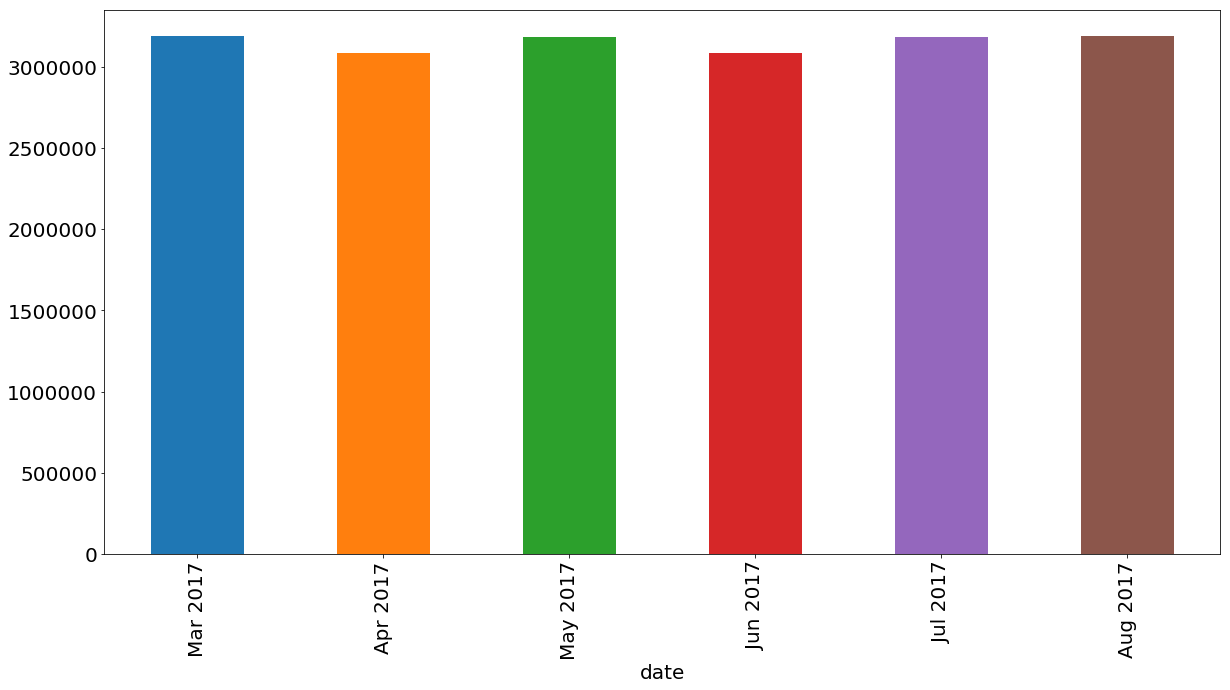

In [16]:
monthsFmt = DateFormatter("%b '%y")
ax = last_6_month.plot.bar()
ax = ax.set_xticklabels([dt.strftime('%b %Y') for dt in last_6_month.index])
print_md("### Not very informative but I want tot plot it")

---

## 4. What are top 10 countries/cities users came from?

#### This part with mapping ip to location wasn't trivial for me at all, my solution may not be the best but it's work and took reasonable amount of time, if i had more time I may come up with better solution


In [17]:
# convert ip to int for faster selection
events_df['int_ip'] = events_df['ip'].apply(ip_address).apply(int)

In [18]:
# get all nets
nets = geo_ipv4_df['network'].apply(ip_network)

In [19]:
# build bindings to saech id 
first_ips = nets.apply(itemgetter(0)).apply(int)

In [20]:
# get all unique addreses
uniq_addrs = events_df['int_ip'].unique()

In [21]:
# get all geonames ids
geoname_ids = geo_ipv4_df.loc[np.digitize(uniq_addrs, first_ips)-1, 'geoname_id'].apply(int)

In [22]:
# merge geoname and ip addresses
ip_to_geoname_id = pd.DataFrame(list(zip(uniq_addrs, geoname_ids)), columns=['ip', 'geoname_id'])

In [23]:
# get geoadata
geo_data = geo_loc_df[['geoname_id', 'country_iso_code', 'country_name', 'city_name']]

In [24]:
# merge geoadata with unique ips
ip_to_geo_data = ip_to_geoname_id.set_index('geoname_id').join(geo_data.set_index('geoname_id'))

In [25]:
# put all info about country and city to events DataFrame
events_df = events_df.join(ip_to_geo_data[['ip', 'country_iso_code', 'country_name', 'city_name']].set_index('ip'), on='int_ip')

In [26]:
grouped_by_country = events_df.groupby(['country_name']).size()

In [27]:
top_10_by_country = grouped_by_country.sort_values(ascending=False)[:10]

In [28]:
print_md("## Top 10 countries:")
for country_name, cnt in top_10_by_country.items():
    print_md("### %s - %s" % (country_name, cnt))


## Top 10 countries:

### Colombia - 13398748

### Peru - 2717732

### Ecuador - 1841615

### Mexico - 1424690

### Panama - 1027062

### United States - 903777

### Argentina - 876654

### El Salvador - 605263

### Guatemala - 559339

### Canada - 301414

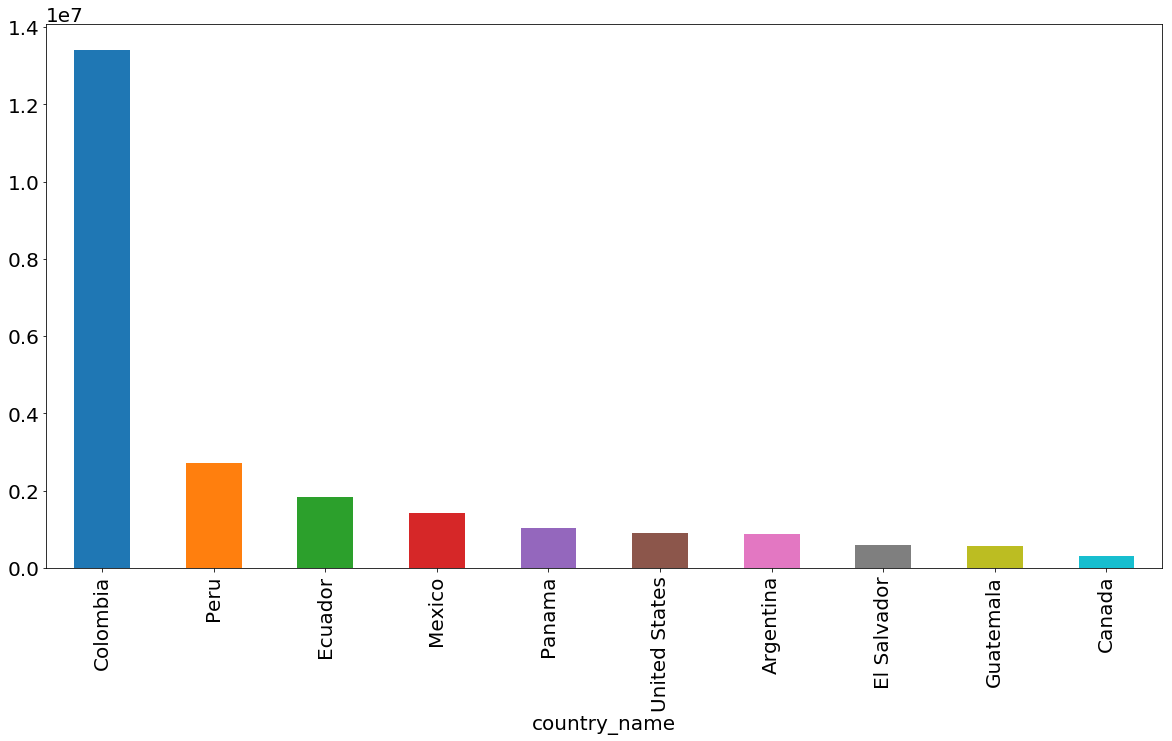

In [29]:
top_10_by_country.plot.bar()

In [30]:
grouped_by_city = events_df.groupby(['city_name']).size()

In [31]:
top_10_by_city = grouped_by_city.sort_values(ascending=False)[:10]

In [32]:
print_md("## Top 10 Cities:")
for city, cnt in top_10_by_city.items():
    print_md("### %s - %s" % (city, cnt))

## Top 10 Cities:

### Bogotá - 4431604

### Lima - 1813892

### Medellín - 1331079

### Quito - 820698

### Guayaquil - 553132

### San Salvador - 469663

### Bucaramanga - 412240

### Santiago de Cali - 388964

### Panama City - 383754

### Guatemala City - 361933

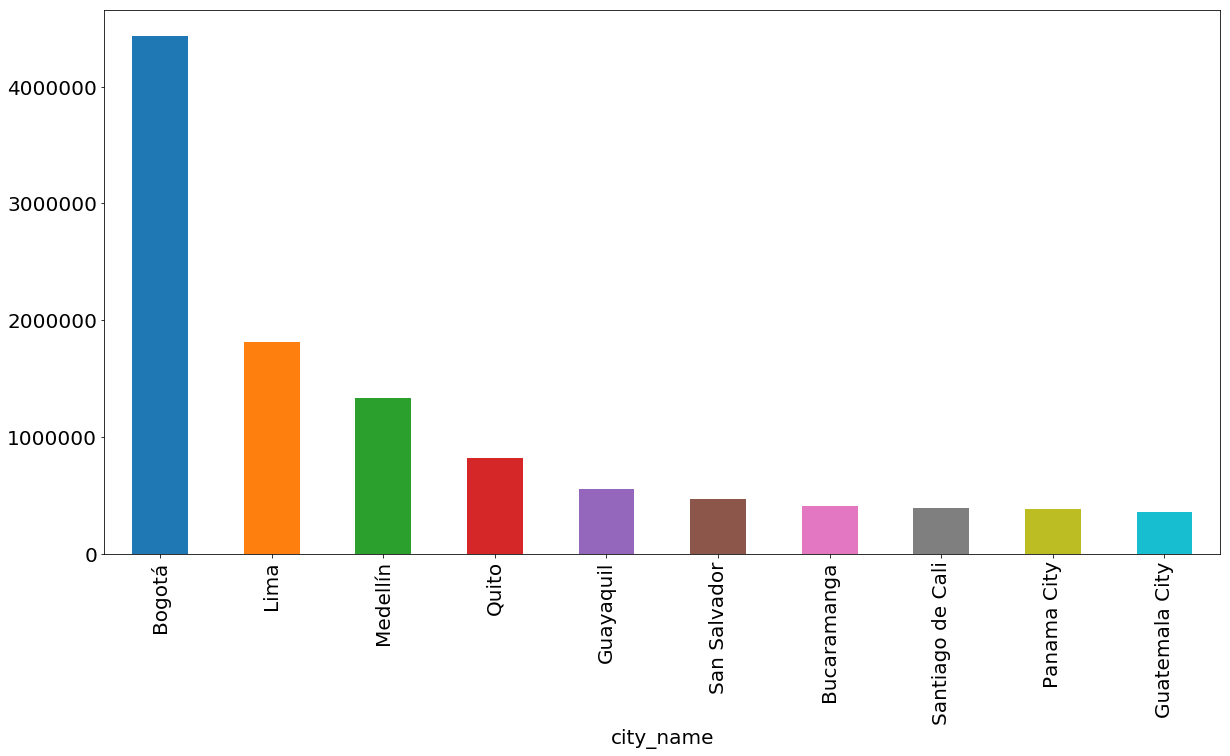

In [33]:
top_10_by_city.plot.bar()

---

## 5. How many unique users we have per country?

In [34]:
unique_by_country = events_df.groupby(['country_name', 'user_id']).size().groupby('country_name').size()

In [35]:
unique_by_country = unique_by_country.sort_values(ascending=False)

In [36]:
unique_by_country

country_name
Colombia                       268014
Peru                            54284
Ecuador                         36807
Mexico                          28486
Panama                          20562
United States                   18084
Argentina                       17522
El Salvador                     12107
Guatemala                       11188
Canada                           6054
Chile                            5765
Brazil                           5369
Costa Rica                       3074
Uruguay                          2219
Haiti                            1732
Honduras                         1126
Jamaica                           968
Bolivia                           789
Paraguay                          776
Venezuela                         650
United Kingdom                    623
Australia                         378
Dominican Republic                319
Nicaragua                         294
France                            274
Italy                             274

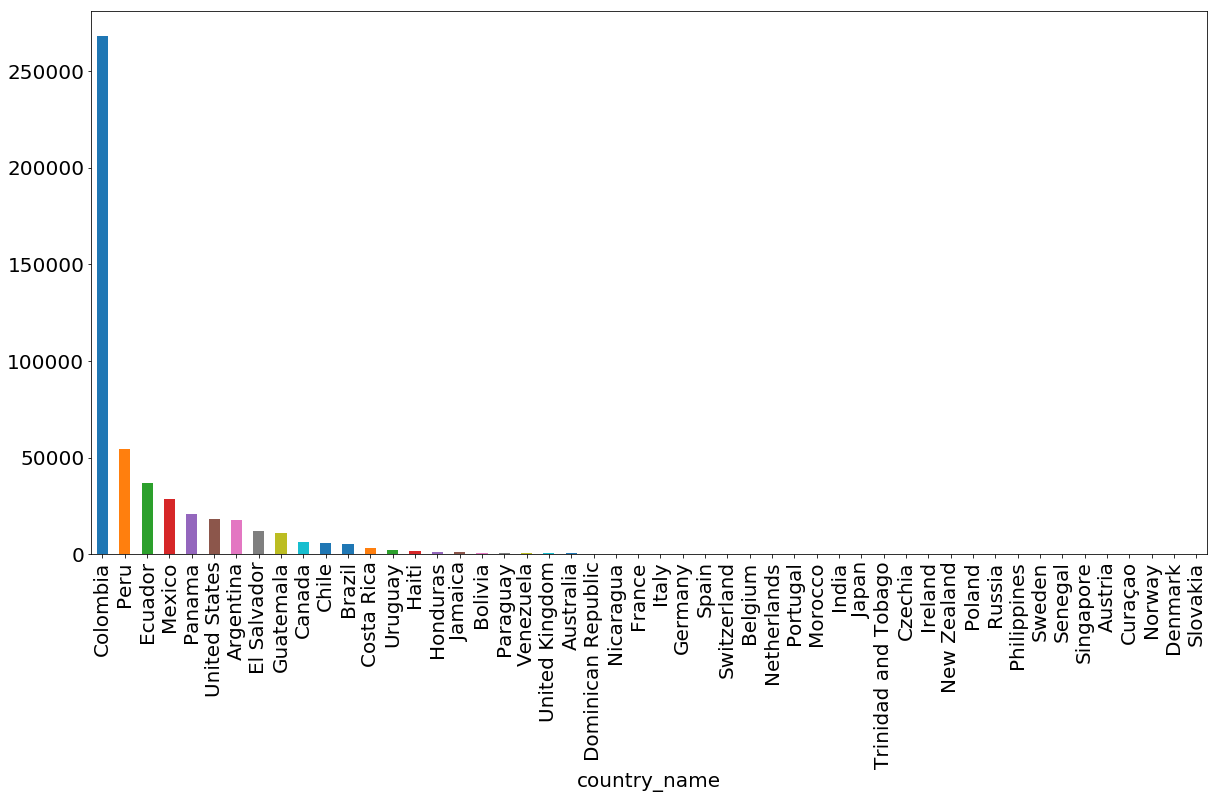

In [37]:
unique_by_country[:50].plot.bar()

---

## 6. What are top 3 cities in each country in terms of average number of events per user?

In [38]:
unique_by_country = events_df.groupby(['country_name', 'city_name', 'user_id']).size()

In [39]:
# mean by users events
sorted_mean = unique_by_country.groupby(['country_name', 'city_name']).mean().sort_values(ascending=False)

In [40]:
# All mean for Argentina
sorted_mean['Argentina']

city_name
Alberti                             64.000000
Platanos                            63.000000
La Consulta                         61.000000
Villa Robles                        60.000000
General Martin Miguel de Gueemes    60.000000
Hernando                            60.000000
Colonia Matilde                     59.500000
Pedro Luro                          59.000000
Puerto Eldorado                     58.400000
Las Parejas                         58.333333
Oro Verde                           58.000000
Brea                                58.000000
Coronel Suárez                      57.666667
Metan                               57.600000
Dean Funes                          57.500000
Manuel B. Gonnet                    57.333333
Junin                               57.250000
Crespo                              57.222222
Cantera Aguirre                     57.000000
Presidencia Roque Sáenz Peña        57.000000
Tornquist                           56.666667
General Cabrera         

In [41]:
take_top_3 = sorted_mean.groupby(['country_name']).head(3)

In [42]:
# Top 3 mean for Argentina
take_top_3['Argentina']

city_name
Alberti        64.0
Platanos       63.0
La Consulta    61.0
dtype: float64

In [43]:
for (country, cities), aver in take_top_3.items():
    print(country, cities, '-', aver)

United States Laurelton - 75.0
Norway Eidsvag - 75.0
Canada O'Leary - 74.0
United States San Gabriel - 74.0
United States DeMotte - 74.0
France Chateaubriant - 74.0
Italy Castellammare di Stabia - 74.0
Belarus Minsk - 72.0
France Ploubalay - 72.0
Philippines Makati City - 71.0
United Kingdom Macduff - 70.0
United Kingdom Currie - 70.0
Brazil Garopaba - 70.0
France Clichy - 70.0
Mexico Calpulalpan - 70.0
Belgium Zaventem - 70.0
Portugal Águeda Municipality - 69.0
Australia Swan View - 69.0
Trinidad and Tobago Chaguanas - 69.0
South Africa George - 69.0
Nicaragua León - 69.0
Canada Arichat - 68.0
India Udupi - 68.0
Spain San Cristóbal de La Laguna - 68.0
Colombia Puerto Narino - 68.0
Brazil Telemaco Borba - 67.0
Italy Certosa di Pavia - 67.0
Brazil Sao Roque - 67.0
Sweden Sandviken - 67.0
Canada Taylor - 67.0
United Kingdom Newbury - 67.0
Croatia Velika Gorica - 67.0
Denmark Aarhus - 66.0
Mexico Domingo Arenas - 66.0
Slovenia Vuzenica - 66.0
Australia Burleigh Heads - 66.0
Mexico Tuzanta

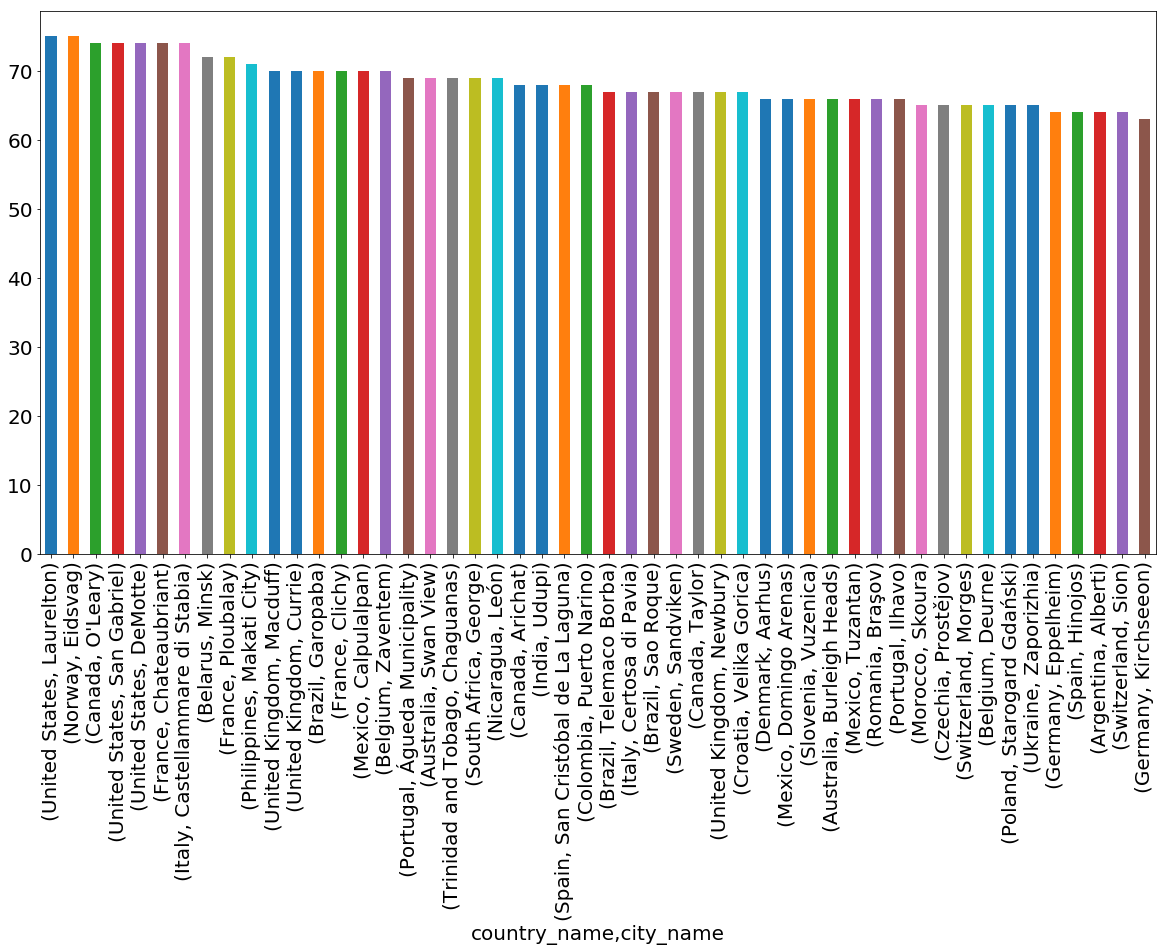

In [44]:
take_top_3[:50].plot.bar()

---

## 7. What is the revenue per country for the last 6 months in the dataset (monthly)?

#### If I understand corrrectly, revenu count from purchased items, I will assume that all items have the save value 1, because I don't have any additional info

In [45]:
events_df['event'].unique()

array(['Click Product', 'View Product', 'Purchase Product'], dtype=object)

In [46]:
grouped_by_month = events_df[events_df['event']=='Purchase Product'].groupby([pd.Grouper(key='date', freq='1M'), 'country_name']).size()

In [47]:
last_6_month = grouped_by_month[grouped_by_month.index.levels[0][-6] : grouped_by_month.index.levels[0][-1]]

In [48]:
last_6_month

date        country_name                     
2017-03-31  Afghanistan                               3
            Albania                                   1
            Algeria                                   2
            Angola                                    3
            Antigua and Barbuda                       1
            Argentina                             11283
            Aruba                                     4
            Australia                               223
            Austria                                  15
            Bahamas                                   4
            Bahrain                                   1
            Bangladesh                                5
            Barbados                                  5
            Belgium                                  88
            Belize                                   11
            Bermuda                                   1
            Bolivia                                 518
  

In [49]:
for (date, country), revenue in last_6_month.items():
    print(date, country, '=', revenue)

2017-03-31 00:00:00 Afghanistan = 3
2017-03-31 00:00:00 Albania = 1
2017-03-31 00:00:00 Algeria = 2
2017-03-31 00:00:00 Angola = 3
2017-03-31 00:00:00 Antigua and Barbuda = 1
2017-03-31 00:00:00 Argentina = 11283
2017-03-31 00:00:00 Aruba = 4
2017-03-31 00:00:00 Australia = 223
2017-03-31 00:00:00 Austria = 15
2017-03-31 00:00:00 Bahamas = 4
2017-03-31 00:00:00 Bahrain = 1
2017-03-31 00:00:00 Bangladesh = 5
2017-03-31 00:00:00 Barbados = 5
2017-03-31 00:00:00 Belgium = 88
2017-03-31 00:00:00 Belize = 11
2017-03-31 00:00:00 Bermuda = 1
2017-03-31 00:00:00 Bolivia = 518
2017-03-31 00:00:00 Bonaire, Sint Eustatius, and Saba = 1
2017-03-31 00:00:00 Brazil = 3421
2017-03-31 00:00:00 Bulgaria = 1
2017-03-31 00:00:00 Cameroon = 1
2017-03-31 00:00:00 Canada = 3906
2017-03-31 00:00:00 Chad = 1
2017-03-31 00:00:00 Chile = 3758
2017-03-31 00:00:00 China = 8
2017-03-31 00:00:00 Colombia = 170339
2017-03-31 00:00:00 Congo = 1
2017-03-31 00:00:00 Costa Rica = 1997
2017-03-31 00:00:00 Cuba = 9
2017-0

---

## 8. Who're the top 5 buyers (in terms of revenue) in each top 3 cities (in terms of number of events) per country for the last 6 months (monthly)?

In [50]:
group_for_events = events_df.groupby([pd.Grouper(key='date', freq='1M'), 'country_name', 'city_name', 'user_id']).size()

In [51]:
mean_events_per_user = group_for_events.groupby(['date', 'country_name', 'city_name']).mean().sort_values(ascending=False)

In [52]:
last_6_month = mean_events_per_user.sort_index(level=0).loc[mean_events_per_user.index.levels[0][-6] : mean_events_per_user.index.levels[0][-1]]

In [53]:
top_3_city = last_6_month.groupby(['date', 'country_name']).head(3)

In [54]:
top_3_city['2017-07-31']['United States']

city_name
Aberdeen    9.0
Abilene     5.0
Abington    5.0
dtype: float64

In [55]:
top_3_city['2017-08-31']['United States']

city_name
Aberdeen    3.0
Abilene     7.0
Abington    3.5
dtype: float64

In [56]:
top_buyers = events_df[events_df['event']=='Purchase Product'].groupby([pd.Grouper(key='date', freq='1M'), 'country_name', 'city_name', 'user_id']).size()

In [57]:
top_5_buyers = top_buyers.groupby(['date', 'country_name', 'city_name']).head(5)

In [58]:
top_5_buyers['2017-08-31', 'United States', 'Woonsocket']

user_id
022ea57e065496f0b2dec8ba4f07a6d3    2
04207c6e3b5a2e874c0a721b59c92212    1
04a4be6e642e80debc31c831a4ba183f    3
0675a5f866e7e194107479dc053693a0    1
0779f899fc5368c09fdcb9359a0683a7    2
dtype: int64

In [59]:
final_result = top_3_city.to_frame().join(top_5_buyers.reset_index('user_id'), lsuffix='_left', rsuffix='_right').dropna()

In [60]:
final_result = final_result.drop(columns=["0_left"]).rename(columns={'0_right':'Sold items'})

In [61]:
final_result

user_id  \
date       country_name         city_name                                               
2017-03-31 Argentina            Abasto               7f603d5bd5f5aee2727fb3dd936e9e98   
                                Abasto               86b059b7e0c8c1c7e4933206d7904149   
                                Abasto               9d998d195ee5b7937bb9c293b2d6caf5   
                                Abasto               b21cab2b5bd23b0aeb3d6ababa1b2609   
                                Abasto               dfd63cb2e4afc7e41e3403df50b28843   
                                Abel                 113fcdac1213cd5f304180e02947d5c3   
                                Abel                 17fa7ea59f28ff29d74d1cacf8669e1d   
                                Abel                 2b92554a70bf6e13cdbb6df96fbe27f2   
                                Abel                 97f43e8799608385b9235398da06b5dd   
                                Acassuso             6c85fb776b91e4711c1481bcd882d020   
           Aruba                Oranjestad           4bfcd7d42716f303e32265e2766bff55   
                                Oranjestad           f6383a027b55a53385b51eba8b036923   
                                Paradera             613764f33f47acef8ad7a9bb0753216a   
           Australia            Adelaide             a06788d59bc79140db03cd431d446618   
                                Advancetown          1cd233d813b18c0eba0b21e00011759b   
           Austria              Graz                 4d46ed38cd5388f32918aa3c5b6bbf0b   
                                Krems                0a6b9c331fcbf2c5ccdf5118c3563f94   
           Bahamas              Nassau               5716fc58919e15c39e22e03f97651c95   
                                Nassau               cd0a088cf40dc3f8156ef3a53190b88e   
                                Nassau               ea71cc889b853a76f2d375a6c30527c2   
           Bangladesh           Mirpur               049b15704bb0ea9e5ad7ddb07fbaf09e   
           Barbados             Bridgetown           f0257dd626c46871a49890778e110ffd   
           Belgium              Arlon                969af30e3e9eccdba9efaaa59138e1fc   
           Belize               Belize City          792a1b05ddabb42f4c83b60658275d81   
                                Belize City          c102761a0ada761f88ff41d99ee589fc   
                                Belize City          ed0a427b45871a199bf59cd7b33a75b9   
                                San Ignacio          381145a7d43a23ca301da395e2ecc871   
           Bermuda              Hamilton             4b27fb73e8f57faff71c0211a0ad811b   
           Bolivia              Cochabamba           06089710bde76f6b440540fd8a4ce0e5   
                                Cochabamba           0d45010eeea935f232ebeaecbbf46007   
...                                                                               ...   
2017-08-31 Thailand             Yasothon             0c9bdf75ad5aa72132a2f471c66191a3   
           Trinidad and Tobago  Arima                9531f504a54a114b8c6a72b5e46a569f   
                                Arima                a2fca357f0273c36caddc23651ec34bb   
                                Arima                f9c60c9df17591d1baf4aa4028df7bc1   
                                Chaguanas            c08fdb8b8092020852b8d344ec5d4db1   
                                Couva                e10415d91e7d9564433ca1f01f9316d7   
           Turkey               Antalya              168560b20faeb23b3a1c27baab6a2043   
                                Istanbul             644f3f4960da1ae8cebdebbfe25d0e56   
                                Istanbul             9fd0f5d5e027250cd1e2ee5f236f81d4   
           Ukraine              Dnipro               07d628e27f956a5078c4f821c66291bd   
                                Kharkiv              712665cd1e2622ca8c8e1fcae6bb99bc   
           United Arab Emirates Abu Dhabi            73f9a347ad2d235468c4bf0c81f76684   
                                Ajman                f8e089c8b3b494ca3fe1

### Example of city with top byers

In [62]:
final_result.loc[('2017-08-31', 'Vietnam', 'Hanoi')]

user_id  \
date       country_name city_name                                     
2017-08-31 Vietnam      Hanoi      075f995fc569012cc08953e9a5da4976   
                        Hanoi      4266a440cc51a9b1129a503a84da6379   
                        Hanoi      a3d050d843f7f23055c6e140f449d532   
                        Hanoi      c952b17509ab1c85d00abf9c120fb4c3   

                                   Sold items  
date       country_name city_name              
2017-08-31 Vietnam      Hanoi             1.0  
                        Hanoi             3.0  
                        Hanoi             1.0  
                        Hanoi             1.0

---

## 9. What is the revenue growth in top 5 cities (in terms of number of events) for each country for the last 6 months in the dataset (monthly)?

In [63]:
group_for_events = events_df.groupby([pd.Grouper(key='date', freq='1M'), 'country_name', 'city_name']).size().sort_values(ascending=False)

In [64]:
top_5_cities = group_for_events.groupby(['date', 'country_name']).head(5)

In [66]:
last_6_month = top_5_cities.sort_index(level=0).loc[top_5_cities.index.levels[0][-6] : top_5_cities.index.levels[0][-1]]

In [67]:
# Top 5 for the last 6 month
last_6_month

date        country_name          city_name           
2017-03-31  Afghanistan           Kabul                       8
            Andorra               Andorra la Vella            7
            Angola                Luanda                      9
            Anguilla              The Valley                  4
            Argentina             Buenos Aires            24173
                                  Córdoba                  8464
                                  La Plata                 3574
                                  Mar del Plata            1998
                                  Villa Angelica           3540
            Aruba                 Oranjestad                 30
                                  Paradera                    4
            Australia             Brisbane                  166
                                  Greenwich                  33
                                  Melbourne                 257
                                  Perth          

In [68]:
revenue_by_city = events_df[events_df['event']=='Purchase Product'].groupby([pd.Grouper(key='date', freq='1M'), 'country_name', 'city_name']).size()

In [69]:
revenue_growth = revenue_by_city.to_frame().groupby(level=2).diff()

In [70]:
revenue_by_city['2017-01-31']['Argentina']

city_name
Abasto                  10
Abel                     3
Acassuso                 3
Acebal                   5
Adrogue                 30
Agronomia                4
Aguas Blancas            5
Aguilares                4
Albardon                 8
Alberdi                  3
Alderetes                2
Aldo Bonzi               1
Alegre                   2
Almafuerte               1
Almagro                  2
Almirante Brown          6
Alta Gracia              3
Altamirano               4
Ana Zumaran              3
Angostura                1
Apostoles                2
Aragones                 3
Arcadia                 11
Arequito                 9
Arroyito                 9
Arroyo Seco              3
Avellaneda              16
Ayacucho                 6
Azul                     6
Bahía Blanca            75
                        ..
Villa Basilio Nievas     3
Villa Bosch              1
Villa Carlos Paz        31
Villa Celina             2
Villa Constitucion      13
Villa Crespo      

In [71]:
revenue_by_city['2017-02-28']['Argentina']

city_name
Abasto                   5
Abel                     2
Acassuso                 2
Acebal                   5
Adrogue                 15
Agronomia                5
Aguas Blancas            7
Aguilares                2
Albardon                 4
Alberdi                  3
Alberti                  3
Alderetes                1
Aldo Bonzi               2
Alegre                   1
Alejandro Korn           4
Almirante Brown          8
Alta Gracia              6
Altamirano               2
Alto Verde               5
Ana Zumaran              3
Angostura                1
Apostoles                3
Aragones                 2
Arcadia                  5
Arequito                 2
Arrecifes                1
Arroyo Seco              5
Asamblea                 2
Avellaneda              24
Azul                     5
                        ..
Villa Ballester         30
Villa Basilio Nievas     1
Villa Bosch              1
Villa Carlos Paz        33
Villa Constitucion      15
Villa Crespo      

In [72]:
revenue_growth.loc[('2017-02-28', 'Argentina')]

,0
city_name,
Abasto,-5.0
Abel,-1.0
Acassuso,-1.0
Acebal,0.0
Adrogue,-15.0
Agronomia,1.0
Aguas Blancas,2.0
Aguilares,-2.0
Albardon,-4.0


In [73]:
last_6_month.to_frame().join(revenue_growth, lsuffix='_events_num', rsuffix='_revenue_growth').dropna()

0_events_num  \
date       country_name                      city_name                            
2017-03-31 Argentina                         Buenos Aires                 24173   
                                             Córdoba                       8464   
                                             La Plata                      3574   
                                             Mar del Plata                 1998   
                                             Villa Angelica                3540   
           Aruba                             Oranjestad                      30   
                                             Paradera                         4   
           Australia                         Brisbane                       166   
                                             Greenwich                       33   
                                             Melbourne                      257   
                                             Perth                           47   
                                             Sydney                         123   
           Austria                           Krems                           10   
                                             Lembach im Muhlkreis             6   
                                             Vienna                          30   
           Bahamas                           Nassau                          58   
           Barbados                          Bridgetown                      14   
           Belgium                           Brussels                       258   
                                             Ghent                           21   
                                             Glain                           31   
                                             Liège                           50   
           Belize                            Belize City                     52   
                                             San Ignacio                      5   
           Bermuda                           Hamilton                        12   
           Bolivia                           Cochabamba                     455   
                                             La Paz                        2814   
                                             Santa Cruz                    1570   
                                             Sucre                           36   
           Bonaire, Sint Eustatius, and Saba Kralendijk                      14   
           Brazil                            Belo Horizonte                1110   
...                                                                         ...   
2017-08-31 Turkey                            Istanbul                        48   
           Ukraine                           Kharkiv                         18   
                                             Zaporizhia                      12   
           United Arab Emirates              Abu Dhabi                       13   
                                             Ajman                            6   
                                             Dubai                           29   
                                             Fujairah                         8   
           United Kingdom                    Ashton-under-Lyne               50   
                                             Harrow                          54   
                                             Islington                       55   
                                             London                         724   
                                             Manchester                      91   
           United States                     Brooklyn                      4532   
                                             Fort Lauderdale               3334   
                                             Los Angeles                   4052   
                                             New York                      3332   


## That's all thanks for attention